<a href="https://www.kaggle.com/abuubaida01/eda-on-customer-personality-analysis?scriptVersionId=85138515" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Customer Personality Analysis
This Project is my Learning Project. This project shows the basic information regarding Customers like The Average Age of our customer,  Child status of Customer etc. 
This project is mainly for learning Cleaning and Transformation of Data. It was a great learning for me.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


# Data Preperation and Cleaning


In [2]:
data = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep='\t', index_col= 'ID')

In [3]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.shape

(2240, 28)

In [5]:
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

seems as if our missing values are only in the Income column. This could correspond to customers with no income so imputation would not make sense here. This dataset is large enough where we can omit these rows.



In [6]:
data = data.dropna()
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


Next we 
want to get a better idea of the ages of our customers. We do not currently have an Age column in our dataframe so lets create one using the Year_Birth feature.



In [7]:
from datetime import date
#age = map(lambda x: date.today().year - x, data['Year_Birth'])
#data['Age'] = data.Year_birth.map(lambda x = date.today().year - data.Year_birth)

def get_age(birthyear):
    return date.today().year - birthyear

# ages = data.Year_Birth.map(get_age)

data["Age"] = data.Year_Birth.apply(get_age)

data.Age.describe()


count    2216.000000
mean       53.179603
std        11.985554
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

it seems that some users are extremely old, the oldest customer is 128 years old! This data might be incorrect. Lets take a closer look.



In [8]:
data.sort_values('Year_Birth')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
ID,,,,,,,,,,,,,,,,,,,,,
11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,...,0,0,0,0,0,0,3,11,0,129
1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,...,0,0,1,0,0,0,3,11,0,123
7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,...,0,0,0,0,0,1,3,11,0,122
6663,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,0,...,0,0,0,0,0,0,3,11,0,82
6932,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,42,...,0,0,1,0,0,0,3,11,0,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,1995,2n Cycle,Single,83257.0,0,0,18-09-2012,56,536,27,...,1,0,1,0,0,1,3,11,1,27
8315,1995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,2,...,0,0,0,0,0,0,3,11,0,27
3661,1995,2n Cycle,Single,80617.0,0,0,12-10-2012,42,594,51,...,0,0,0,0,0,0,3,11,0,27


We observe that we have three customers who were born in the 19th century. Surely this cannot be correct. Lets drop these rows.



In [9]:
#data[data.Year_Birth < 1900].drop(axis = 0)
data.drop([11004, 1150, 7829], inplace = True)



Next lets create some new features in our dataframe. The first being a total sum of all the spending for each customer titled Spending. We will also create another feature that includes the number of months each customer has been with the company. This will allow us to cluster the customers in groups of new and old as well as big and small spenders.



In [10]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [11]:
data['Spending'] = data.MntWines + data.MntFruits + data.MntMeatProducts + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds
data['Time_With_Company'] = pd.to_datetime(data.Dt_Customer, dayfirst = True, format = '%d-%m-%Y')
data['Time_With_Company'] = pd.to_numeric(data.Time_With_Company.dt.date.apply(lambda z: (date.today() - z)).dt.days, downcast = 'integer') / 30

In [12]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Time_With_Company
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,3,11,1,65,1617,113.933333
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,3,11,0,68,27,95.600000
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,3,11,0,57,776,102.233333
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,3,11,0,38,53,96.466667
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,3,11,0,41,422,97.200000


Lets now take a look at the Education feature. This will allow us to better understand the demographic of customer base.



In [13]:
data.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

There are only a few unique values for this feature so we can leave it be. Lets do the same with the Marital_Status feature now.



In [14]:
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Seems like we have a larger number of unique values for this column. Some of these values are similar in definition so lets group them togheter to make our analysis easier.



In [15]:
data.Marital_Status = data.Marital_Status.replace({"Divorced": "Single", "Together": "Partner","Married": "Partner", "Widow": "Single", "Alone": "Single", "Absurd": "Single","YOLO": "Single"})
#data.head()

Lets create some new features regarding the children of the customers



In [16]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Time_With_Company
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,3,11,1,65,1617,113.933333
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,3,11,0,68,27,95.600000
4141,1965,Graduation,Partner,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,3,11,0,57,776,102.233333
6182,1984,Graduation,Partner,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,3,11,0,38,53,96.466667
5324,1981,PhD,Partner,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,3,11,0,41,422,97.200000


In [17]:
data['Children'] = data.Kidhome + data.Teenhome
data['Has_Child'] = np.where(data.Children > 0, 'Has Child', 'No Child')
data.tail()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Time_With_Company,Children,Has_Child
ID,,,,,,,,,,,,,,,,,,,,,
10870,1967,Graduation,Partner,61223.0,0,1,13-06-2013,46,709,43,...,0,0,3,11,0,55,1341,104.533333,1,Has Child
4001,1946,PhD,Partner,64014.0,2,1,10-06-2014,56,406,0,...,0,0,3,11,0,76,444,92.466667,3,Has Child
7270,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,...,0,0,3,11,0,41,1241,97.000000,0,No Child
8235,1956,Master,Partner,69245.0,0,1,24-01-2014,8,428,30,...,0,0,3,11,0,66,843,97.033333,1,Has Child
9405,1954,PhD,Partner,52869.0,1,1,15-10-2012,40,84,3,...,0,0,3,11,1,68,172,112.566667,2,Has Child


Finally, lets rename some of our column names.



In [18]:
data= data.rename(columns = { "MntWines": "Wine",
                              "MntFruits": "Fruit",
                              "MntMeatProducts": "Meat",
                              "MntFishProducts": "Fish",
                              "MntSweetProducts" : "Sweets",
                              "MntGoldProds": "Gold"})
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wine,Fruit,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Time_With_Company,Children,Has_Child
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,3,11,1,65,1617,113.933333,0,No Child
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,3,11,0,68,27,95.600000,2,Has Child
4141,1965,Graduation,Partner,71613.0,0,0,21-08-2013,26,426,49,...,0,0,3,11,0,57,776,102.233333,0,No Child
6182,1984,Graduation,Partner,26646.0,1,0,10-02-2014,26,11,4,...,0,0,3,11,0,38,53,96.466667,1,Has Child
5324,1981,PhD,Partner,58293.0,1,0,19-01-2014,94,173,43,...,0,0,3,11,0,41,422,97.200000,1,Has Child


In [19]:
data =data.rename(columns = {"NumWebPurchases" : "Web",
                             "NumCatalogPurchases" : "Catalog",
                             "NumStorePurchases" : "Store",
                             "NumWebVisitsMonth" : "WebVisits"})


### Lets take a look at the values for web purchases



In [20]:
data.Web.describe()

count    2213.000000
mean        4.087664
std         2.741664
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: Web, dtype: float64

In [21]:
#data.groupby('Web').count()
data.Web.value_counts()

2     367
1     347
3     334
4     276
5     219
6     201
7     154
8     102
9      75
0      48
11     44
10     43
23      1
27      1
25      1
Name: Web, dtype: int64

Seems like we have some outlier values, lets remove them.



In [22]:
outlier_IDs = data.loc[data.Web > 20].index
data.drop(outlier_IDs, inplace = True)
data.Web.value_counts()

2     367
1     347
3     334
4     276
5     219
6     201
7     154
8     102
9      75
0      48
11     44
10     43
Name: Web, dtype: int64

We will do the same for the Catalog and Store columns



In [23]:
#data.Catalog.unique()
data.Catalog.describe()


count    2210.000000
mean        2.674661
std         2.927762
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: Catalog, dtype: float64

In [24]:
x= data.loc[data.Catalog > 20].index
data.drop(x, inplace = True)

In [25]:
data.Store.describe()
data.Store.value_counts()

3     484
4     318
2     218
5     211
6     177
8     147
7     141
10    124
9     106
12    104
13     83
11     80
0       9
1       4
Name: Store, dtype: int64

Lets group together our clean dataframe and select the columns we wish to analyze.



In [26]:
data= data[[ "Education", "Marital_Status", "Has_Child", "Children", "Age", "Income", "Spending", "Time_With_Company", "Wine", "Fruit", "Meat", "Sweets", "Gold", "Web", "Catalog", "Store", "WebVisits"]]

In [27]:
data.head()

,Education,Marital_Status,Has_Child,Children,Age,Income,Spending,Time_With_Company,Wine,Fruit,Meat,Sweets,Gold,Web,Catalog,Store,WebVisits
ID,,,,,,,,,,,,,,,,,
5524,Graduation,Single,No Child,0,65,58138.0,1617,113.933333,635,88,546,88,88,8,10,4,7
2174,Graduation,Single,Has Child,2,68,46344.0,27,95.600000,11,1,6,1,6,1,1,2,5
4141,Graduation,Partner,No Child,0,57,71613.0,776,102.233333,426,49,127,21,42,8,2,10,4
6182,Graduation,Partner,Has Child,1,38,26646.0,53,96.466667,11,4,20,3,5,2,0,4,6
5324,PhD,Partner,Has Child,1,41,58293.0,422,97.200000,173,43,118,27,15,5,3,6,5


# Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Education level of Customer')]

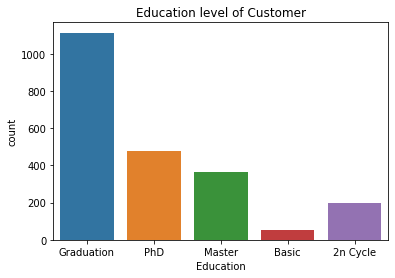

In [28]:
import seaborn as sns
sns.countplot(data.Education).set(title = "Education level of Customer")
#sns.title = "Education level of Customer"

Seems like a majority of customers have a graduate degree (Bachelor's). It also seems like the second highest group includes customers with PhD's. Lets look at marital status now.



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Marital Status')]

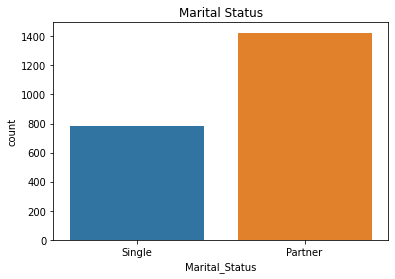

In [29]:
sns.countplot(data.Marital_Status).set(title  = "Marital Status")

Seems like the number of customers in a relationship is almost double the number of single customers. This could be useful for marketing purposes. Let's move on to the child status of our customers.



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Child status of Customer')]

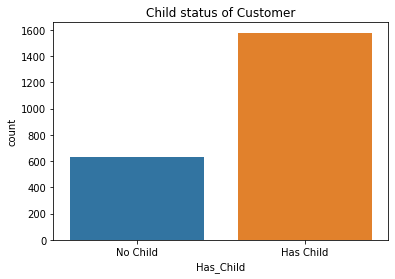

In [30]:
sns.countplot(data.Has_Child).set(title = "Child status of Customer")

An overwhelming majority of customers have at least one child. Now what about the age of our customers?



The Average Age of our customer is 53 year 



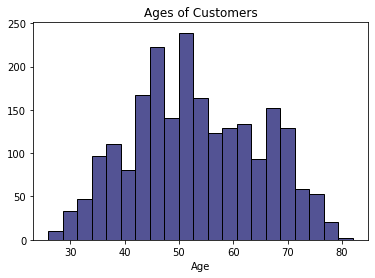

In [31]:
sns.histplot(data.Age, color = 'midnightblue').set(title = "Ages of Customers", ylabel = None, xlabel = "Age")
print("The Average Age of our customer is", round(np.mean(data.Age)), 'year \n')

The age of our customers varies over a wide range. However it seems like most of our customers are middle aged (40-60 years).

